In [1]:
pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 28.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=b18e2d7cbf70ecdeb0e313404c703b0db2e6b2886b6cedc0160e53546e9d46ed
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize_matplotlib


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import japanize_matplotlib

In [4]:
train_dfs = []
for i in range(47):
    num = str(i+1).zfill(2)
    train_dfs.append(pd.read_csv(num+".csv"))
train_df = pd.concat(train_dfs)
train_df.reset_index(drop=True, inplace=True)
test_df = pd.read_csv("test.csv")


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
print(train_df.shape)
train_df.head()

(751560, 28)


,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1020026,中古マンション等,NaN,1102,北海道,札幌市北区,新琴似８条,麻生,6,２ＬＤＫ,...,NaN,NaN,NaN,近隣商業地域,80.0,500.0,2013年第4四半期,NaN,NaN,6.301030
1,1028771,中古マンション等,NaN,1103,北海道,札幌市東区,北３３条東,新道東,NaN,２ＬＤＫ,...,NaN,NaN,NaN,NaN,NaN,NaN,2009年第3四半期,未改装,NaN,7.176091
2,1044035,中古マンション等,NaN,1105,北海道,札幌市豊平区,平岸１条,平岸(札幌市営),5,２ＬＤＫ,...,NaN,NaN,NaN,第２種住居地域,60.0,200.0,2019年第4四半期,改装済,NaN,7.146128
3,1090865,中古マンション等,NaN,1203,北海道,小樽市,朝里川温泉,朝里,30分?60分,１Ｋ,...,NaN,NaN,NaN,第２種住居地域,60.0,200.0,2016年第3四半期,未改装,NaN,6.740363
4,1008219,中古マンション等,NaN,1101,北海道,札幌市中央区,南８条西,西１８丁目,14,３ＬＤＫ,...,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2007年第4四半期,改装済,NaN,6.740363


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751560 entries, 0 to 751559
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            751560 non-null  int64  
 1   種類            751560 non-null  object 
 2   地域            0 non-null       float64
 3   市区町村コード       751560 non-null  int64  
 4   都道府県名         751560 non-null  object 
 5   市区町村名         751560 non-null  object 
 6   地区名           750890 non-null  object 
 7   最寄駅：名称        748788 non-null  object 
 8   最寄駅：距離（分）     728362 non-null  object 
 9   間取り           724050 non-null  object 
 10  面積（㎡）         751560 non-null  object 
 11  土地の形状         0 non-null       float64
 12  間口            0 non-null       float64
 13  延床面積（㎡）       0 non-null       float64
 14  建築年           729671 non-null  object 
 15  建物の構造         730717 non-null  object 
 16  用途            672943 non-null  object 
 17  今後の利用目的       384492 non-null  object 
 18  前面道路

In [7]:
l = len(train_df)
df = pd.concat([train_df,test_df])
df.drop(['地域','土地の形状','間口','延床面積（㎡）','前面道路：方位','前面道路：種類','前面道路：幅員（ｍ）'], inplace=True,axis=1)
train_df = df[:l]
test_df = df[l:]
test_df.head()

,ID,種類,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,...,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1000057,中古マンション等,1101,北海道,札幌市中央区,大通西,大通,5,２ＬＤＫ,75,...,ＲＣ,NaN,住宅,商業地域,80.0,600.0,2022年第1四半期,改装済,NaN,NaN
1,1000077,中古マンション等,1101,北海道,札幌市中央区,大通西,西１１丁目,1,３ＬＤＫ,75,...,ＲＣ,NaN,その他,商業地域,80.0,600.0,2022年第2四半期,未改装,NaN,NaN
2,1000081,中古マンション等,1101,北海道,札幌市中央区,大通西,西１１丁目,3,２ＬＤＫ,75,...,ＲＣ,NaN,住宅,商業地域,80.0,600.0,2022年第2四半期,未改装,NaN,NaN
3,1000128,中古マンション等,1101,北海道,札幌市中央区,大通西,西１８丁目,3,２ＬＤＫ,50,...,ＲＣ,NaN,住宅,商業地域,80.0,400.0,2022年第2四半期,改装済,NaN,NaN
4,1000129,中古マンション等,1101,北海道,札幌市中央区,大通西,西１８丁目,0,１Ｒ,20,...,ＳＲＣ,NaN,住宅,商業地域,80.0,400.0,2022年第2四半期,未改装,NaN,NaN


In [8]:
train_df.describe()

,ID,市区町村コード,建ぺい率（％）,容積率（％）,取引価格（総額）_log
count,7.515600e+05,751560.000000,726811.000000,726811.000000,751560.000000
mean,1.850737e+07,18525.018398,67.690528,302.820155,7.231624
std,9.562456e+06,9592.101003,10.415187,148.420827,0.356035
min,1.000007e+06,1101.000000,30.000000,50.000000,2.653213
25%,1.307699e+07,13107.000000,60.000000,200.000000,7.041393
50%,1.403367e+07,14104.000000,60.000000,200.000000,7.278754
75%,2.703655e+07,27114.000000,80.000000,400.000000,7.462398
max,4.703684e+07,47213.000000,80.000000,1300.000000,9.934498


In [9]:
h = 1.5*(7.462398-7.041393)
train_df = train_df[train_df["取引価格（総額）_log"] < 7.462398 + h]
train_df = train_df[train_df["取引価格（総額）_log"] > 7.041393-h]

(array([ 19284.,  33536.,  59431.,  93657., 116136., 167270., 145723.,
         64167.,  24138.,   6806.]),
 array([6.41497335, 6.58139414, 6.74781493, 6.91423572, 7.08065651,
        7.2470773 , 7.41349809, 7.57991888, 7.74633967, 7.91276046,
        8.07918125]),
 <a list of 10 Patch objects>)

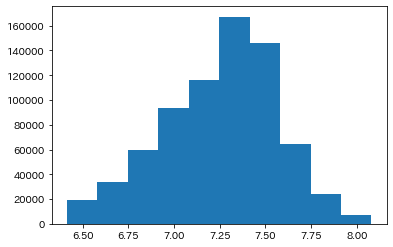

In [10]:
plt.hist(train_df["取引価格（総額）_log"])

In [11]:
l = len(train_df)
df = pd.concat([train_df,test_df])
df["面積（㎡）"] = df["面積（㎡）"].replace("2000㎡以上","2000")
df["面積（㎡）"].astype(int)
train_df = df[:l]
test_df = df[l:]

In [12]:
import warnings
warnings.simplefilter('ignore')

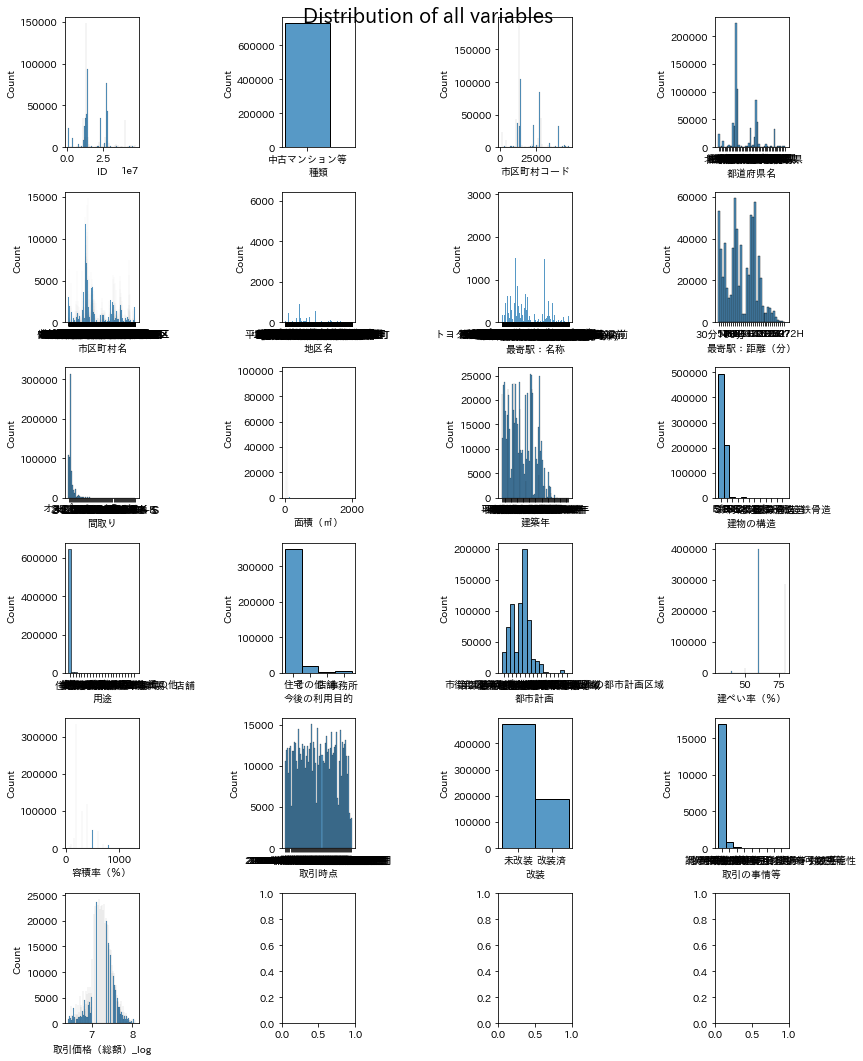

In [12]:
ncols = 4
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.histplot(train_df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [13]:
numerical_feats = train_df.dtypes[train_df.dtypes != "object"].index
print("Numerical: ", len(numerical_feats))

categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index
print("Categorical: ", len(categorical_feats))

Numerical:  5
Categorical:  16


In [14]:
print("Numerical:",numerical_feats)
print("Caetgorical:",categorical_feats)

Numerical: Index(['ID', '市区町村コード', '建ぺい率（％）', '容積率（％）', '取引価格（総額）_log'], dtype='object')
Caetgorical: Index(['種類', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '最寄駅：距離（分）', '間取り', '面積（㎡）',
       '建築年', '建物の構造', '用途', '今後の利用目的', '都市計画', '取引時点', '改装', '取引の事情等'],
      dtype='object')


In [15]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(14)

,Total,Percent
取引の事情等,712172,0.975380
今後の利用目的,356005,0.487579
用途,76143,0.104284
改装,69727,0.095497
間取り,26251,0.035953
容積率（％）,23704,0.032465
建ぺい率（％）,23704,0.032465
最寄駅：距離（分）,22689,0.031075
建築年,20815,0.028508
建物の構造,20146,0.027592


In [16]:
cols_fillna = ["今後の利用目的","改装","間取り","都市計画",'建物の構造']
for col in cols_fillna:
    if col in ["今後の利用目的","間取り"]:
        train_df[col].fillna('その他',inplace=True)
        test_df[col].fillna('その他',inplace=True)
    else:
        train_df[col].fillna('None',inplace=True)
        test_df[col].fillna('None',inplace=True)

In [17]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(14)

,Total,Percent
取引の事情等,712172,0.975380
用途,76143,0.104284
容積率（％）,23704,0.032465
建ぺい率（％）,23704,0.032465
最寄駅：距離（分）,22689,0.031075
建築年,20815,0.028508
最寄駅：名称,2657,0.003639
地区名,645,0.000883
改装,0,0.000000
取引時点,0,0.000000


In [18]:
l = len(train_df)
df = pd.concat([train_df,test_df])
df["最寄駅：距離（分）"].replace({"30分?60分":"45","1H?1H30":"75","2H?":"120",'1H30?2H':"105"},inplace = True)
df["最寄駅：距離（分）"] = df["最寄駅：距離（分）"].astype(float)

In [19]:
def convert_wareki_to_seireki(wareki):
    if wareki == wareki:
        if wareki == '戦前':
            wareki = '昭和20年'
        value = wareki[2:-1]
        if value == '元':
            value = 1
        else:
            value = int(value)
        if '昭和' in wareki:
            seireki = 1925+value
        elif '平成' in wareki:
            seireki = 1988+value
        elif '令和' in wareki:
            seireki = 2018+value
    else:
        seireki = wareki
    return seireki
df['建築年'] = df['建築年'].apply(lambda x: convert_wareki_to_seireki(x))

In [20]:
df['取引時点_何年前'] = df['取引時点'].apply(lambda x: 2021-int(x[:4]))
df.drop(['取引時点'], axis=1, inplace=True)

In [21]:
df["面積（㎡）"] = df["面積（㎡）"].astype(int)

In [22]:
train_df = df[:l]
test_df = df[l:]

In [23]:
cols_fillna = ["建築年","容積率（％）","建ぺい率（％）","最寄駅：距離（分）"]
for col in cols_fillna:
    train_df[col].fillna(train_df[col].mean(), inplace=True)
    test_df[col].fillna(test_df[col].mean(), inplace=True)

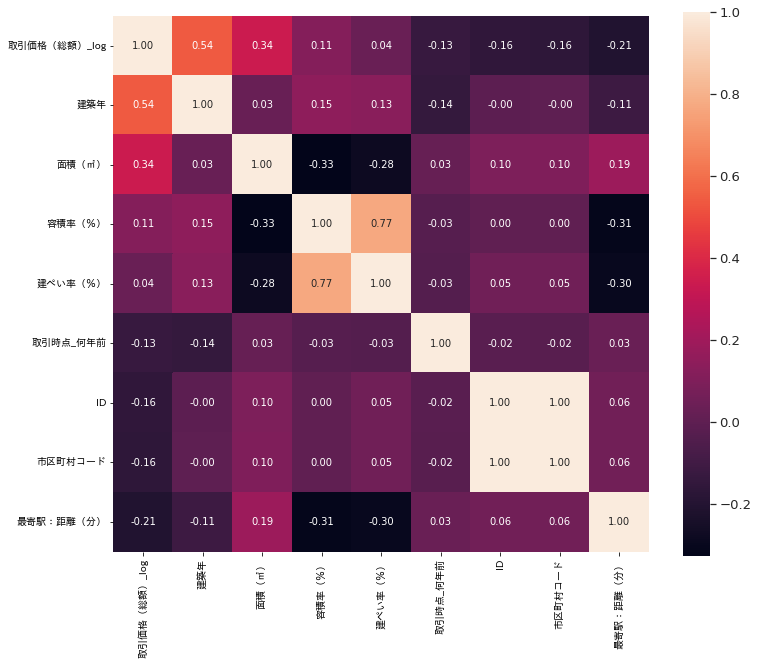

In [24]:
k = 12 # number of variables for heatmap
df = train_df
corrmat = df.corr()
cols = corrmat.nlargest(k, '取引価格（総額）_log')['取引価格（総額）_log'].index
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
fig.savefig("figure4.png")

In [38]:
cols = ['最寄駅：距離（分）', '建物の構造','取引時点_何年前', '改装', '間取り', '面積（㎡）','建築年','建ぺい率（％）', '容積率（％）']
train_X = train_df[cols]
train_Y = train_df['取引価格（総額）_log']
test_data = test_df[cols]

In [39]:
from sklearn.preprocessing import LabelEncoder
df = pd.concat([train_X,test_data])
cols = [ '建物の構造','改装', '間取り',]
for col in cols:
    le = LabelEncoder()
    encoded = le.fit_transform(df[col].values)
    decoded = le.inverse_transform(encoded)
    df[col] = encoded

In [40]:
df

,最寄駅：距離（分）,建物の構造,取引時点_何年前,改装,間取り,面積（㎡）,建築年,建ぺい率（％）,容積率（％）
1,11.500088,5,12,2,28,70,1999.0,67.681784,303.013558
2,5.000000,9,2,1,28,70,1974.0,60.000000,200.000000
3,45.000000,5,5,2,7,30,1991.0,60.000000,200.000000
4,14.000000,5,14,1,40,65,1974.0,80.000000,300.000000
5,7.000000,5,6,2,40,80,2003.0,60.000000,200.000000
...,...,...,...,...,...,...,...,...,...
20529,3.000000,5,-1,2,40,80,2019.0,60.000000,200.000000
20530,15.000000,5,-1,0,20,50,1990.0,60.000000,200.000000
20531,11.116140,5,-1,2,28,70,2008.0,60.000000,200.000000
20532,11.116140,9,-1,0,40,70,1991.0,60.000000,200.000000


In [41]:
train_X = df[:l]
test = df[l:]

In [42]:
train_X.shape

(730148, 9)

In [44]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=0)

In [45]:
from sklearn.metrics import mean_absolute_error
SEED = 0

params = {
    'objective': 'regression',
    'metric': 'mae',
    'num_leaves': 42,
    'max_depth': 7,
    "feature_fraction": 0.8,
    'subsample_freq': 1,
    "bagging_fraction": 0.95,
    'min_data_in_leaf': 2,
    'learning_rate': 0.1,
    "boosting": "gbdt",
    "lambda_l1": 0.1,
    "lambda_l2": 10,
    "verbosity": -1,
    "random_state": 42,
    "num_boost_round": 50000,
    "early_stopping_rounds": 100
}
train_data = lgb.Dataset(X_train, label=Y_train)
val_data = lgb.Dataset(X_test, label=Y_test)
model = lgb.train(
    params,
    train_data, 
    valid_names = ['train', 'valid'],
    valid_sets =[train_data, val_data], 
    verbose_eval = 100,
)
val_pred = model.predict(X_test, num_iteration=model.best_iteration)
score = mean_absolute_error(Y_test, val_pred)
print(score)

Training until validation scores don't improve for 100 rounds.
[100]	train's l1: 0.144672	valid's l1: 0.144499
[200]	train's l1: 0.142725	valid's l1: 0.142919
[300]	train's l1: 0.141517	valid's l1: 0.14197
[400]	train's l1: 0.14065	valid's l1: 0.141347
[500]	train's l1: 0.139876	valid's l1: 0.140806
[600]	train's l1: 0.139286	valid's l1: 0.14043
[700]	train's l1: 0.138712	valid's l1: 0.140084
[800]	train's l1: 0.138106	valid's l1: 0.139685
[900]	train's l1: 0.137625	valid's l1: 0.139433
[1000]	train's l1: 0.137207	valid's l1: 0.139212
[1100]	train's l1: 0.136759	valid's l1: 0.138964
[1200]	train's l1: 0.136358	valid's l1: 0.138777
[1300]	train's l1: 0.135975	valid's l1: 0.138581
[1400]	train's l1: 0.135634	valid's l1: 0.13844
[1500]	train's l1: 0.13531	valid's l1: 0.138294
[1600]	train's l1: 0.134961	valid's l1: 0.138131
[1700]	train's l1: 0.134619	valid's l1: 0.137974
[1800]	train's l1: 0.134323	valid's l1: 0.137864
[1900]	train's l1: 0.134016	valid's l1: 0.137723
[2000]	train's l1: 0

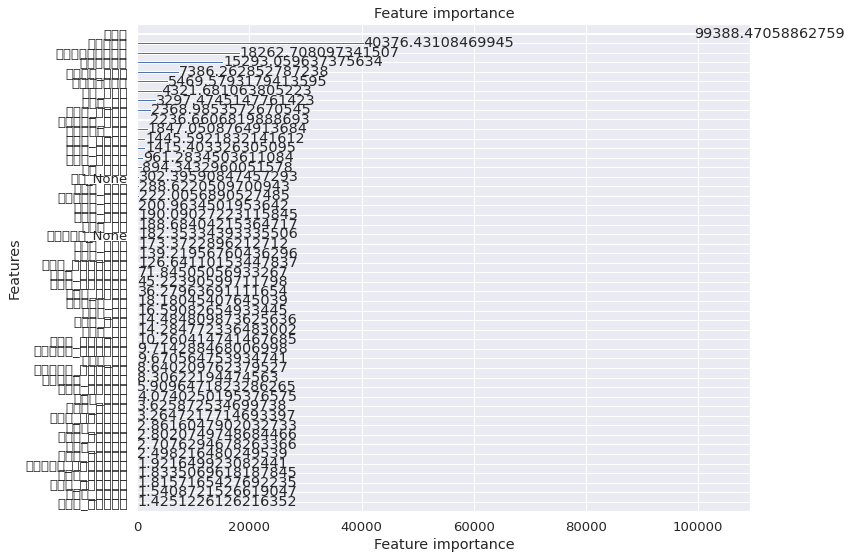

In [46]:
lgb.plot_importance(model, figsize=(12,8), max_num_features=50, importance_type='gain')
plt.tight_layout()
plt.show()
plt.close()

In [48]:
test_pred = model.predict(test, num_iteration=model.best_iteration)

In [49]:
sample = pd.read_csv("sample_submission.csv")
sample

,ID,取引価格（総額）_log
0,1000057,0
1,1000077,0
2,1000081,0
3,1000128,0
4,1000129,0
...,...,...
20529,47001654,0
20530,47001707,0
20531,47003198,0
20532,47005507,0


In [51]:
sample["取引価格（総額）_log"] = test_pred

In [57]:
sample.to_csv('/content/test_submission.csv',index = False)